

# Clouds!

### <font color=red> Please use the template below to answer the _complete workshop questions from the course notes_.</font>

## your name: Frank D'Agostino

In [1]:
# import libraries and get data:
import sys
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
import pickle
from scipy.integrate import solve_ivp
# cortopy allows to plot data over maps in various spherical prjections"
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy import config
from mpl_toolkits.axes_grid1 import make_axes_locatable

# load the data from a pickle file:
with open('./clouds_variables.pickle', 'rb') as file:
    while 1:
        try:
            d = pickle.load(file)
        except (EOFError):
            break
            # print information about each extracted variable:
        for key in list(d.keys()):
            print("extracting pickled variable: name=", key,  "; size=", d[key].shape)
            #print("type=",type(d[key]))
        globals().update(d)

extracting pickled variable: name= Delta_LW_CRF_GFDL ; size= (90, 144)
extracting pickled variable: name= Delta_LW_CRF_Hadley ; size= (145, 192)
extracting pickled variable: name= Delta_SAT_GFDL ; size= (90, 144)
extracting pickled variable: name= Delta_SAT_Hadley ; size= (145, 192)
extracting pickled variable: name= Delta_SW_CRF_GFDL ; size= (90, 144)
extracting pickled variable: name= Delta_SW_CRF_Hadley ; size= (145, 192)
extracting pickled variable: name= clouds_GFDL_historical ; size= (90, 144)
extracting pickled variable: name= clouds_GFDL_latitude ; size= (90,)
extracting pickled variable: name= clouds_GFDL_longitude ; size= (144,)
extracting pickled variable: name= clouds_GFDL_rcp85 ; size= (90, 144)
extracting pickled variable: name= clouds_Hadley_historical ; size= (145, 192)
extracting pickled variable: name= clouds_Hadley_latitude ; size= (145,)
extracting pickled variable: name= clouds_Hadley_longitude ; size= (192,)
extracting pickled variable: name= clouds_Hadley_rcp85 ;

### Explanation of input data:
The above variables are results from two prominent climate models (Geophysical Fluid Dynamics Laboratory in Princeton NJ, and Hadley center in the UK. The variable Delta_LW_CRF_GFDL, for example, then represents
$$\Delta CRF_{LW}=CRF_{RCP8.5,LW}-CRF_{historical,LW}.$$
and similarly for the other cloud variables. 

The variables Delta_SAT_GFDL/Hadley represent the difference in surface air temperature between RFP8.5 at 2100 and historical run at 1850.

clouds_... represent maps of the fraction of the sky covered with clouds as function of longitude and latitude.

# 1) Clouds radiative forcing and climate sensitivity in climate models:

## 1a) plot cloud fraction in two models, historical, RCP85 and the difference between the two scenarios

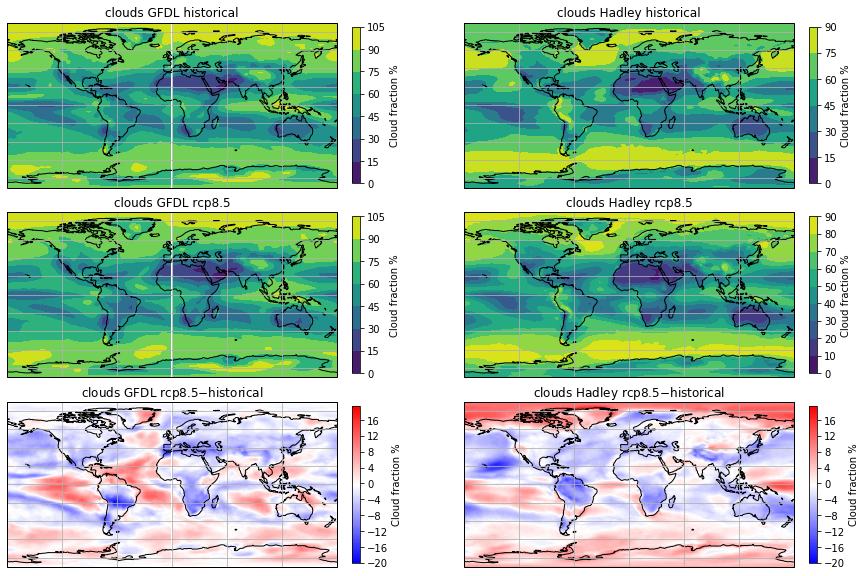

Clearly, between the two models, there is a lot of contradiction in the projected cloud coverage. For example, the GDFL model shows almost no change in cloud coverage in the Arctic, but in the Hadley model it shows an extreme increase in cloud coverage.
Since clouds have so much uncertainty in the future, that makes it more difficult to predict future climate change because clouds are integral in regulating and altering the Earth's temperature.


In [2]:
# plot clouds in two models:
# ---------------------------

# preliminaries, defining configuration of subplots:
projection=ccrs.PlateCarree(central_longitude=0.0)
fig,axes=plt.subplots(3,2,figsize=(18,9),subplot_kw={'projection': projection})


# GFDL historical:
# ----------------
axes[0,0].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[0,0].coastlines(resolution='110m')
axes[0,0].gridlines()
c=axes[0,0].contourf(clouds_GFDL_longitude,clouds_GFDL_latitude, clouds_GFDL_historical)
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[0,0])
clb.set_label('Cloud fraction %')
axes[0,0].set_title('clouds GFDL historical')


# GFDL rcp8.5:
# ------------
axes[1,0].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[1,0].coastlines(resolution='110m')
axes[1,0].gridlines()
c=axes[1,0].contourf(clouds_GFDL_longitude,clouds_GFDL_latitude, clouds_GFDL_rcp85)
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[1,0])
clb.set_label('Cloud fraction %')
axes[1,0].set_title('clouds GFDL rcp8.5')


# GFDL difference:
# ----------------
contour_levels_diff = np.arange(-20, 20, 0.5)
axes[2,0].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[2,0].coastlines(resolution='110m')
axes[2,0].gridlines()
c=axes[2,0].contourf(clouds_GFDL_longitude,clouds_GFDL_latitude, clouds_GFDL_rcp85-clouds_GFDL_historical, contour_levels_diff, cmap="bwr")
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[2,0])
clb.set_label('Cloud fraction %')
axes[2,0].set_title('clouds GFDL rcp8.5$-$historical')

# Hadley historical:
# ----------------
axes[0,1].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[0,1].coastlines(resolution='110m')
axes[0,1].gridlines()
c=axes[0,1].contourf(clouds_Hadley_longitude,clouds_Hadley_latitude, clouds_Hadley_historical)
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[0,1])
clb.set_label('Cloud fraction %')
axes[0,1].set_title('clouds Hadley historical')


# Hadley rcp8.5:
# ------------
axes[1,1].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[1,1].coastlines(resolution='110m')
axes[1,1].gridlines()
c=axes[1,1].contourf(clouds_Hadley_longitude,clouds_Hadley_latitude, clouds_Hadley_rcp85)
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[1,1])
clb.set_label('Cloud fraction %')
axes[1,1].set_title('clouds Hadley rcp8.5')


# Hadley difference:
# ----------------
axes[2,1].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[2,1].coastlines(resolution='110m')
axes[2,1].gridlines()
c=axes[2,1].contourf(clouds_Hadley_longitude,clouds_Hadley_latitude, clouds_Hadley_rcp85-clouds_Hadley_historical, contour_levels_diff, cmap="bwr")
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[2,1])
clb.set_label('Cloud fraction %')
axes[2,1].set_title('clouds Hadley rcp8.5$-$historical')


# finalize and show plot:
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.01, right=0.95, hspace=0.15,wspace=-0.4)
plt.show()

print("Clearly, between the two models, there is a lot of contradiction in the projected cloud coverage. For example, the GDFL model shows almost no change in cloud coverage in the Arctic, but in the Hadley model it shows an extreme increase in cloud coverage.")
print("Since clouds have so much uncertainty in the future, that makes it more difficult to predict future climate change because clouds are integral in regulating and altering the Earth's temperature.")

## 1b) plot $\Delta$CRF in two models: for LW, SW

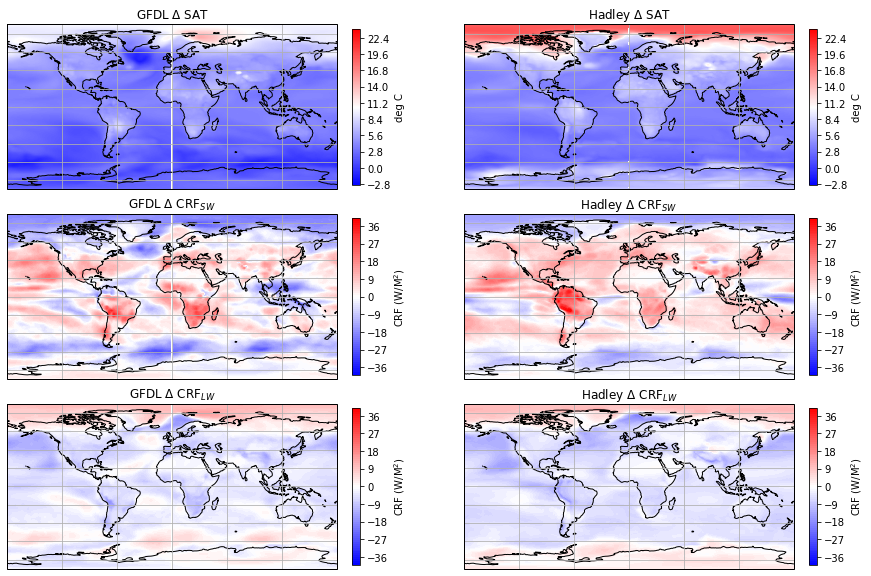

Once again, there is a lot of contradiction between the models, specifically around the North pole.


In [45]:
# plot CRF in two models:
# ---------------------------

# Variable names for reference
#extracting pickled variable: name= Delta_LW_CRF_GFDL ; size= (90, 144)
#extracting pickled variable: name= Delta_LW_CRF_Hadley ; size= (145, 192)
#extracting pickled variable: name= Delta_SAT_GFDL ; size= (90, 144)
#extracting pickled variable: name= Delta_SAT_Hadley ; size= (145, 192)
#extracting pickled variable: name= Delta_SW_CRF_GFDL ; size= (90, 144)
#extracting pickled variable: name= Delta_SW_CRF_Hadley ; size= (145, 192)

# preliminaries, defining configuration of subplots:
projection=ccrs.PlateCarree(central_longitude=0.0)
fig,axes=plt.subplots(3,2,figsize=(18,9),subplot_kw={'projection': projection})
contour_levels_SAT=np.arange(-3,24.1,0.1)
contour_levels_CRF=np.arange(-40,41,1)

# GFDL Delta SAT:
# ----------------
axes[0,0].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[0,0].coastlines(resolution='110m')
axes[0,0].gridlines()
c=axes[0,0].contourf(clouds_GFDL_longitude,clouds_GFDL_latitude, Delta_SAT_GFDL, contour_levels_SAT, cmap="bwr")
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[0,0])
clb.set_label('deg C')
axes[0,0].set_title('GFDL $\Delta$ SAT')


# GFDL Delta CRF SW:
# ------------------
axes[1,0].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[1,0].coastlines(resolution='110m')
axes[1,0].gridlines()
c=axes[1,0].contourf(clouds_GFDL_longitude,clouds_GFDL_latitude,  Delta_SW_CRF_GFDL, contour_levels_CRF, cmap="bwr")
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[1,0])
clb.set_label('CRF (W/M$^2$)')
axes[1,0].set_title('GFDL $\Delta$ CRF$_{SW}$')


# GFDL Delta CRF LW:
# ------------------
contour_levels_diff=np.arange(-20,20.6,0.5)
axes[2,0].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[2,0].coastlines(resolution='110m')
axes[2,0].gridlines()
c=axes[2,0].contourf(clouds_GFDL_longitude,clouds_GFDL_latitude,  Delta_LW_CRF_GFDL, contour_levels_CRF, cmap="bwr")
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[2,0])
clb.set_label('CRF (W/M$^2$)')
axes[2,0].set_title('GFDL $\Delta$ CRF$_{LW}$')

# Hadley Delta SAT:
# ----------------
axes[0,1].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[0,1].coastlines(resolution='110m')
axes[0,1].gridlines()
c=axes[0,1].contourf(clouds_Hadley_longitude,clouds_Hadley_latitude,  Delta_SAT_Hadley, contour_levels_SAT, cmap="bwr")
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[0,1])
clb.set_label('deg C')
axes[0,1].set_title('Hadley $\Delta$ SAT')


# Hadley Delta CRF SW:
# --------------------
axes[1,1].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[1,1].coastlines(resolution='110m')
axes[1,1].gridlines()
c=axes[1,1].contourf(clouds_Hadley_longitude,clouds_Hadley_latitude,  Delta_SW_CRF_Hadley, contour_levels_CRF, cmap="bwr")
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[1,1])
clb.set_label('CRF (W/M$^2$)')
axes[1,1].set_title('Hadley $\Delta$ CRF$_{SW}$')


# Hadley Delta CRF LW:
# --------------------
axes[2,1].set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
axes[2,1].coastlines(resolution='110m')
axes[2,1].gridlines()
c=axes[2,1].contourf(clouds_Hadley_longitude,clouds_Hadley_latitude,  Delta_LW_CRF_Hadley, contour_levels_CRF, cmap="bwr")
clb=plt.colorbar(c, shrink=0.95, pad=0.02,ax=axes[2,1])
clb.set_label('CRF (W/M$^2$)')
axes[2,1].set_title('Hadley $\Delta$ CRF$_{LW}$')


# finalize and show plot:
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.01, right=0.95, hspace=0.15,wspace=-0.4)
plt.show()

print("Once again, there is a lot of contradiction between the models, specifically around the North pole.")

## 2) Amospheric convection

### First, some preliminaries:

In [6]:
# PHYSICAL CONSTANTS
PZERO   = 101325.0 # sea-level pressure, N/sq.m
g       = 9.81     # gravity
R_water = 461.52   # gas constant J/kg/K
R_dry   = 287      # gas constant J/kg/K
cp_dry  = 1005     # J/kg/K
L       = 24.93e5  # latent heat J/kg (vaporization at t.p.)


def SimpleAtmosphere(z):
    """ Compute temperature as a function of height in a simplified standard atmosphere. 
    Correct to 20 km. Approximate thereafter.
    Input: z, geometric altitude, km.
    Output: std. temperature
    """
    TZERO   = 298.15   # sea-level temperature, Kelvin

    if z<11.0:      # troposphere
        theta=(298.15-6.5*z)/298.15
    else:       # stratosphere
        theta=226.65/298.15
    return TZERO*theta


def q_sat(T,P):
    """
    Calculate saturation specific humidity (gr water vapor per gram moist air).
    inputs:
    T: temperature, in Kelvin
    P: pressure, in mb
    """
    R_v = 461 # Gas constant for moist air = 461 J/(kg*K)
    R_d = 287 # Gas constant 287 J K^-1 kg^-1
    TT = T-273.15 # Kelvin to Celsius
    # Saturation water vapor pressure (mb) from Emanuel 4.4.14 p 116-117: 
    ew = 6.112*np.exp((17.67 * TT) / (TT + 243.5))
    # saturation mixing ratio (gr water vapor per gram dry air):
    rw = (R_d / R_v) * ew / (P - ew)
    # saturation specific humidity (gr water vapor per gram moist air):
    qw = rw / (1 + rw)
    return qw

## 2a) Graphically find the temperature and RH of a rising moist air parcel:

q_surf,qsat(z)= 0.004955132772215343 0.0062689951946691535
For 0.5 km: q_surf<qsat, parcel is not saturated at this new level
q_surf,qsat(z)= 0.004955132772215343 0.0016943305414707866
For 3.0 km: q_surf>qsat, parcel must be saturated at this new level


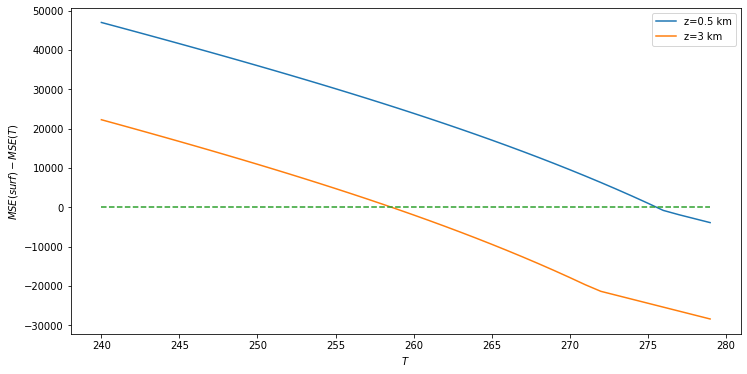

In [16]:
# specify properties of the parcel at the surface:
T_surf=280.0
z_surf=0.0
RH_surf=0.8
q_surf=RH_surf*q_sat(T_surf,1000)
MSE_surf = cp_dry*T_surf+g*z_surf+L*q_surf

# Do it for 0.5 km
# height and pressure to which parcel is raised:
z=500 # meters
# Assume isothermal atmosphere to calculate the atmospheric pressure at z:
T_const = 273.15
p = PZERO*np.exp(-g*z/R_dry/T_const)/100 # convert pressure to mb for q_sat

# plot MSE conservation assuming parcel is saturated:
T_plot=np.arange(240.0,280.0,1.0)
delta_MSE_plot=T_plot*0.0
for i in range(0,len(T_plot)):
    MSE=T_plot[i]*cp_dry+L*min(q_surf, q_sat(T_plot[i], p))+g*z
    delta_MSE_plot[i]=MSE_surf - MSE

plt.figure(figsize=(12,6))
plt.plot(T_plot,delta_MSE_plot);

# Do it for 3 km
# height and pressure to which parcel is raised:
z=3000 # meters
# Assume isothermal atmosphere to calculate the atmospheric pressure at z:
T_const = 273.15
p = PZERO*np.exp(-g*z/R_dry/T_const)/100 # convert pressure to mb for q_sat

# plot MSE conservation assuming parcel is saturated:
T_plot=np.arange(240.0,280.0,1.0)
delta_MSE_plot=T_plot*0.0
for i in range(0,len(T_plot)):
    MSE=T_plot[i]*cp_dry+L*min(q_surf, q_sat(T_plot[i], p))+g*z
    delta_MSE_plot[i]=MSE_surf - MSE

plt.plot(T_plot,delta_MSE_plot);

# plot a dash thin line denoting zero value
plt.plot(T_plot, delta_MSE_plot*0, '--')
plt.ylabel("$MSE(surf)-MSE(T)$")
plt.xlabel("$T$")
plt.legend(("z=0.5 km", "z=3 km"))

# Given the solution for the temperature of the parcel, 
# check if the parcel is expected to be saturated:
T_solution= 275 # get this value from the graph for 0.5 km
qsat=q_sat(T_solution,p)
print("q_surf,qsat(z)=",q_surf,qsat)
if q_surf > qsat:
    print("For 0.5 km: q_surf>qsat, parcel must be saturated at this new level")
else:
    print("For 0.5 km: q_surf<qsat, parcel is not saturated at this new level")

T_solution= 258 # get this value from the graph for 3 km
qsat=q_sat(T_solution,p)
print("q_surf,qsat(z)=",q_surf,qsat)
if q_surf > qsat:
    print("For 3.0 km: q_surf>qsat, parcel must be saturated at this new level")
else:
    print("For 3.0 km: q_surf<qsat, parcel is not saturated at this new level")

## 2b) Calculate profiles of temperature and RH in convection:

In the diagrams, as altitude increases, temperature decreases.
Further, the relative humidity increases as it rises to higher altitudes.
According to the notes, the Lift Condensation Level (LCL) is about 1 km for a parcel of initial saturation of 0.7.
Further, the notes say that the average Level of Free Convection (LFC) is around 2 km for the same initial saturation.


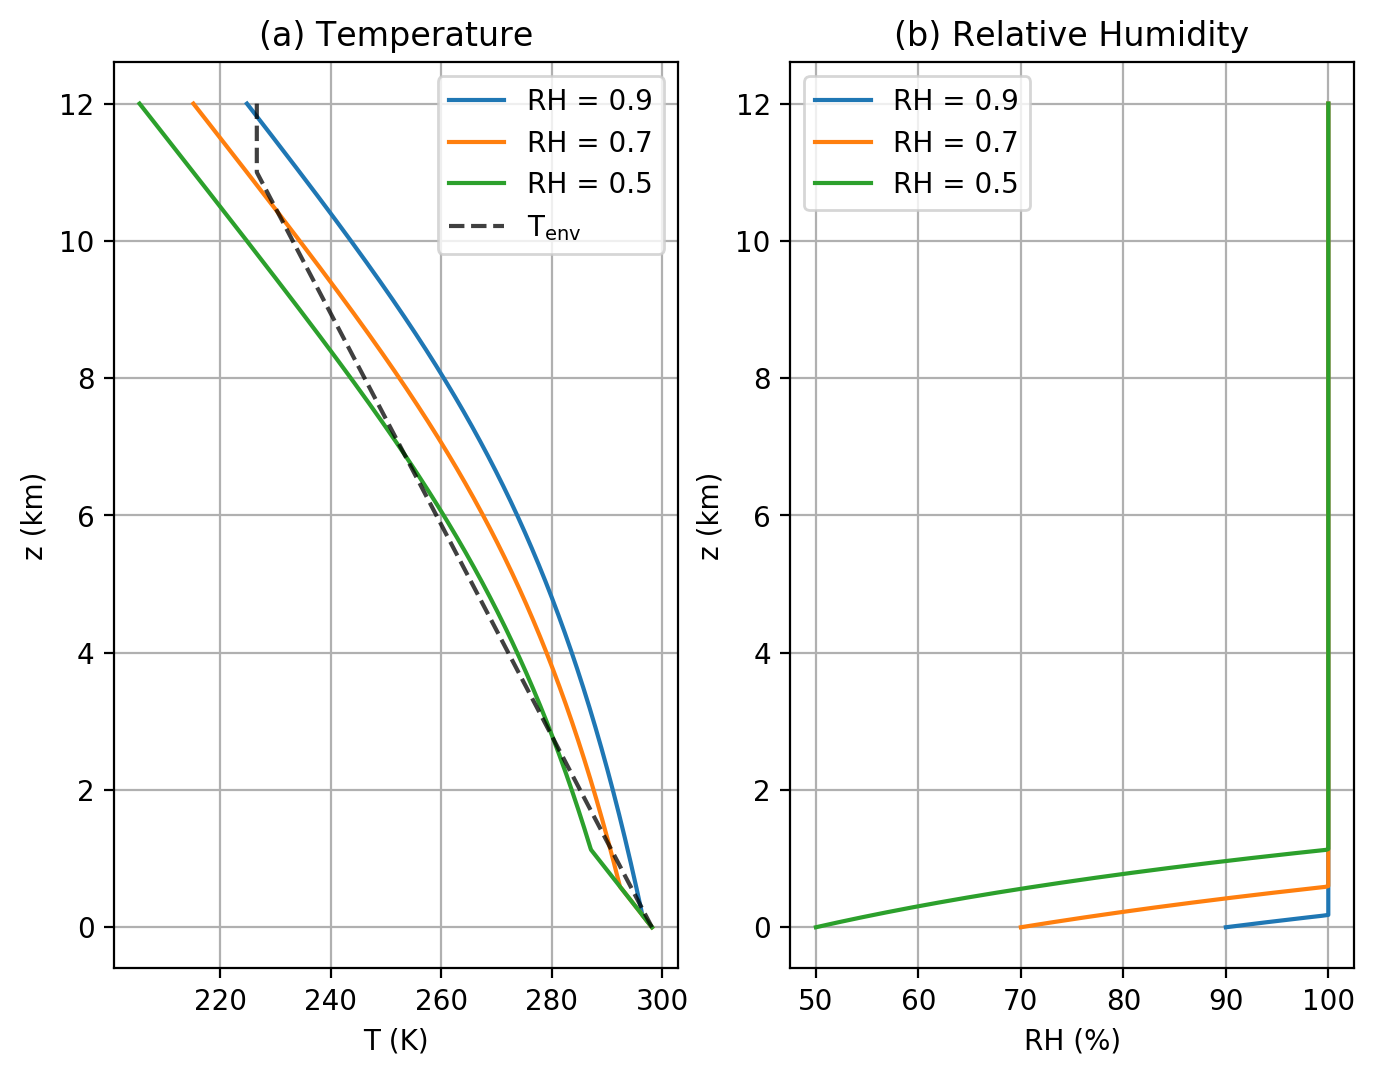

In [46]:
# Define the height coordinates, calculate background pressure and temperature profiles. 
z = np.linspace(0,12,1001) # z in km
p = np.zeros(np.shape(z))  # initialize P array
T_env = np.zeros(np.shape(z))  # initialize T array

# Assume isothermal atmosphere to calculate the atmospheric pressure at z:
T_const = 273.15
p = PZERO*np.exp(-g*z/R_dry/T_const)/100 # convert pressure to mb for q_sat

for i in range(len(z)):
    theta = SimpleAtmosphere(z[i])
    T_env[i] = theta

def MSE_conservation(T,P,z,MSE_s,q_s):
    """ This function is called by a root finder to calculate 
    the temperature of a rising parcel. it is equal to zero when 
    MSE conservation is satisfied.
    """
    qsat=q_sat(T,P)
    # the root finder is looking for the value of T for which the following is zero:
    ans = cp_dry*T+L*min(q_s,qsat)+g*z-MSE_s  
    return(ans)


def calc_T_and_RH_profiles_in_convection(p_s,T_s,z_s,RH_s):
    """ Use conservation of MSE to calculate the temperature and RH profiles of a 
        adiabatically lifted moist parcel.
    """

    q_s=RH_s*q_sat(T_s,p_s)
    # initial MSE at surface, to be conserved by rising air parcel:
    MSE_s = L*q_s+T_s*cp_dry+g*z_s
    T_parcel = np.zeros(np.shape(z))
    RH_parcel = np.zeros(np.shape(z))
    
    T_parcel[0] = T_s
    RH_parcel[0] = RH_s
    for i in range(1,len(z)):
        sol = optimize.root(MSE_conservation, T_parcel[i-1], args=(p[i],z[i]*1000,MSE_s,q_s))
        T_parcel[i] = sol.x
        qsat=q_sat(T_parcel[i],p[i])
        q=min(q_s,qsat) 
        RH_parcel[i] = min(q/qsat, 1.0)
            
    return(RH_parcel,T_parcel)


# initialize figure and two subplots for temperature and relative humidity:
plt.figure(figsize=(8,6),dpi=200)
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

# calculate and plot a convcection profile for 90%:
p0 = p[0] # surface pressure
T0 = 273.15 + 25 #T[0] surface temperature
z0 = z[0] # surface height
RH = 0.9 # initial relative humidity
RHpath,T_parcel = calc_T_and_RH_profiles_in_convection(p0,T0,z0,RH)
ax1.plot(T_parcel,z,label="T parcels")
ax2.plot(100*RHpath,z,label="RH")

# for 70%
p0 = p[0] # surface pressure
T0 = 273.15 + 25 #T[0] surface temperature
z0 = z[0] # surface height
RH = 0.7 # initial relative humidity
RHpath,T_parcel = calc_T_and_RH_profiles_in_convection(p0,T0,z0,RH)
ax1.plot(T_parcel,z,label="T parcels")
ax2.plot(100*RHpath,z,label="RH")

# for 50%
p0 = p[0] # surface pressure
T0 = 273.15 + 25 #T[0] surface temperature
z0 = z[0] # surface height
RH = 0.5 # initial relative humidity
RHpath,T_parcel = calc_T_and_RH_profiles_in_convection(p0,T0,z0,RH)
ax1.plot(T_parcel,z,label="T parcels")
ax2.plot(100*RHpath,z,label="RH")

# plot environment temperature profile:
ax1.plot(T_env,z,color='k',linestyle='--',alpha=0.75,label="T environment")  # Plot atmospheric background. 
ax1.legend(("RH = 0.9", "RH = 0.7", "RH = 0.5", "T$_\mathrm{env}$"))
ax1.set_xlabel('T (K)')
ax1.set_ylabel('z (km)')
ax1.set_title('(a) Temperature')
ax1.grid() 

# second subplot:
ax2.legend(("RH = 0.9", "RH = 0.7", "RH = 0.5"))
ax2.set_xlabel('RH (%)')
ax2.set_title('(b) Relative Humidity')
ax2.grid();
ax2.set_ylabel('z (km)')

print("In the diagrams, as altitude increases, temperature decreases.")
print("Further, the relative humidity increases as it rises to higher altitudes.")
print("According to the notes, the Lift Condensation Level (LCL) is about 1 km for a parcel of initial saturation of 0.7.")
print("Further, the notes say that the average Level of Free Convection (LFC) is around 2 km for the same initial saturation.")

## 2c) Effects of entrainment

Discuss, following the detailed question in the workshop problem in the course notes.

If a volume of rising air entrains the same volume of dry air from its surroundings when at 1 km as it rises, I would expect its temperature to increase as condensation releases energy, it's RH to increase as a result of the increased temperature, and its motion to accelerate due to the increase in heat.

## 3) Cloud feedbacks in a 2-level energy balance model:|

## 3a) Estimate climate sensitivity with and without cloud feedbacks

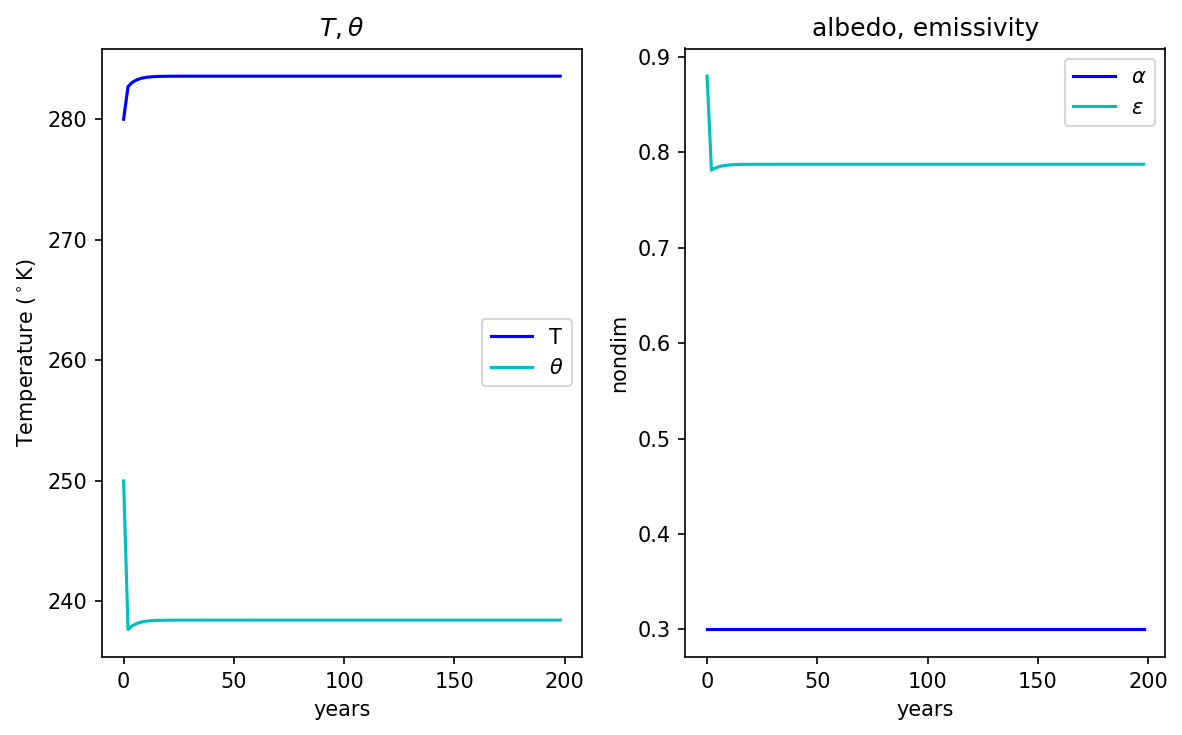

Due to the doubling of CO2, surface temperature is expected to slowly increase and plateau, atmospheric temperature is expected to decrease, emissivity is expected to decrease, and albedo is expected to stay relatively constant.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


########################################################################
def rhs(time,T,C_ocn,C_atm):
    ########################################################################
    # right hand side of the equation for DeltaS:
    T_ocn=T[0]
    theta=T[1]
    rhs= \
        np.array([ (S*(1-alpha(T_ocn))+epsilon(theta)*sigma*theta**4-sigma*T_ocn**4)/C_ocn # rhs of first equation:
        # rhs of second equation
        ,(epsilon(theta)*sigma*T_ocn**4-2*epsilon(theta)*sigma*theta**4)/C_atm])
    return rhs


########################################################################
def alpha(T):
    # albedo as function of temperature representing low cloud effects
    ########################################################################
    alpha0=0.3
    alph=alpha0*(1+Delta_SW*(T-T_ref))
    return alph
    
    
########################################################################
def epsilon(theta):
    # atmospheric emissivity as function of temperature, representing high cloud effects
    ########################################################################
    epsilon0=0.8+0.2*np.log10(CO2/280)
    eps=epsilon0*(1+Delta_LW*(theta-theta_ref))
    return np.minimum(1.0,eps)


########################################################################
## Main program:
########################################################################

# set parameters:
year=365*24*3600;
time_max=200*year;
Cp_w=4000
rho_w=1000
C_ocn=Cp_w*rho_w*50
C_atm=C_ocn/5
sigma=5.67e-8
T_ref=284.0
theta_ref=240
S=1270/4
CO2=280.0
Delta_SW=0.0  # try -0.02 to 0.1
Delta_LW=0.01  # try +/- 0.02


# run the energy balance model:
# -----------------------------
T_init=[280,250] # initial conditions
teval=np.arange(0,time_max,time_max/100)
tspan=(teval[0],teval[-1])
sol = solve_ivp(fun=lambda time,T: rhs(time,T,C_ocn,C_atm) \
                ,vectorized=False,y0=T_init,t_span=tspan,t_eval=teval,rtol=1.0e-6)
time=sol.t
T=sol.y


# save model output to be plotted:
# --------------------------------
T_plot=np.zeros(len(T[0,:]))
theta_plot=np.zeros(len(T[0,:]))
alpha_plot=np.zeros(len(T[0,:]))
epsilon_plot=np.zeros(len(T[0,:]))
i=0;
for t in T_plot:
    T_plot[i]=T[0,i];
    theta_plot[i]=T[1,i];
    alpha_plot[i]=alpha(T[0,i])
    epsilon_plot[i]=epsilon(T[1,i])
    i=i+1;

N=len(T_plot)


########################################################################
## plots:
########################################################################
plt.figure(1,figsize=(8,5),dpi=150)

plt.subplot(1,2,1)
plt.plot(time/year,T_plot,'b-',markersize=1,label="T")
plt.plot(time/year,theta_plot,'c-',markersize=1,label="$\\theta$")
plt.xlabel('years');
plt.ylabel('Temperature ($^\\circ$K)');
plt.title('$T,\\theta$');
plt.legend()

plt.subplot(1,2,2)
plt.plot(time/year,alpha_plot,'b-',markersize=1,label="$\\alpha$")
plt.plot(time/year,epsilon_plot,'c-',markersize=1,label="$\\epsilon$")
plt.xlabel('years');
plt.ylabel('nondim');
plt.title('albedo, emissivity');
plt.legend()
plt.tight_layout()
plt.show()

print("Due to the doubling of CO2, surface temperature is expected to slowly increase and plateau, atmospheric temperature is expected to decrease, emissivity is expected to decrease, and albedo is expected to stay relatively constant.")

## 3b) Estimate the short wave cloud feedback parameter $\Delta_{SW}$ needed to increase the predicted warming at $\times$2CO$_2$ by 2C relative to the case of no cloud feedbacks.

In [38]:
# First, no cloud feedbacks:
# ------------------------------
CO2=280.0
Delta_SW=0.0
Delta_LW=0.0 
sol = solve_ivp(fun=lambda time,T: rhs(time,T,C_ocn,C_atm) \
                ,vectorized=False,y0=T_init,t_span=tspan,t_eval=teval,rtol=1.0e-6)
T_steady=sol.y[:,-1]
print("CO2=",CO2,", Delta_SW=",Delta_SW,", Delta_LW=",Delta_LW)
print("The steady state temperature [T, theta]=",T_steady)

CO2=560.0
sol = solve_ivp(fun=lambda time,T: rhs(time,T,C_ocn,C_atm) \
                ,vectorized=False,y0=T_init,t_span=tspan,t_eval=teval,rtol=1.0e-6)
T_steady=sol.y[:,-1]
print("CO2=",CO2,", Delta_SW=",Delta_SW,", Delta_LW=",Delta_LW)
print("The steady state temperature [T, theta]=",T_steady)

# Next, with SW cloud feedbacks:
# ------------------------------
# repeat the above with SW cloud feedback
CO2=280.0
Delta_SW=-0.01
Delta_LW=0.0
sol = solve_ivp(fun=lambda time,T: rhs(time,T,C_ocn,C_atm) \
                ,vectorized=False,y0=T_init,t_span=tspan,t_eval=teval,rtol=1.0e-6)
T_steady=sol.y[:,-1]
print("CO2=",CO2,", Delta_SW=",Delta_SW,", Delta_LW=",Delta_LW)
print("The steady state temperature [T, theta]=",T_steady)

CO2=560.0
sol = solve_ivp(fun=lambda time,T: rhs(time,T,C_ocn,C_atm) \
                ,vectorized=False,y0=T_init,t_span=tspan,t_eval=teval,rtol=1.0e-6)
T_steady=sol.y[:,-1]
print("CO2=",CO2,", Delta_SW=",Delta_SW,", Delta_LW=",Delta_LW)
print("The steady state temperature [T, theta]=",T_steady)

print("\nClearly, the difference between 280 and 560 ppm of CO2 when Delta_SW is 0 is about 3.5 degrees.") 
print("When Delta_SW is made about -0.01, the difference between temps for 280 and 560 ppm is about 5.5 degrees.")
print("Therefore, we have found a Delta_SW such that the difference is about 2 degrees higher than the difference when Delta_SW is 0.")
print("This makes sense that the value is negative, because we would want more SW radiation being allowed to pass through the clouds than reflected, aiding in warming the Earth.")

CO2= 280.0 , Delta_SW= 0.0 , Delta_LW= 0.0
The steady state temperature [T, theta]= [284.29999767 239.06690572]
CO2= 560.0 , Delta_SW= 0.0 , Delta_LW= 0.0
The steady state temperature [T, theta]= [287.98216464 242.16312499]
CO2= 280.0 , Delta_SW= -0.01 , Delta_LW= 0.0
The steady state temperature [T, theta]= [284.43127412 239.17734897]
CO2= 560.0 , Delta_SW= -0.01 , Delta_LW= 0.0
The steady state temperature [T, theta]= [289.73588459 243.63802841]

Clearly, the difference between 280 and 560 ppm of CO2 when Delta_SW is 0 is about 3.5 degrees.
When Delta_SW is made about -0.01, the difference between temps for 280 and 560 ppm is about 5.5 degrees.
Therefore, we have found a Delta_SW such that the difference is about 2 degrees higher than the difference when Delta_SW is 0.
This makes sense that the value is negative, because we would want more SW radiation being allowed to pass through the clouds than reflected, aiding in warming the Earth.


## 3c) Estimate the long wave cloud feedback parameter $\Delta_{LW}$ needed to decrease the predicted warming at $\times$2CO$_2$ by 2C relative to the case of no cloud feedbacks.

In [44]:
# First, no cloud feedbacks:
# --------------------------
CO2=280.0
Delta_SW=0.0
Delta_LW=0.0 
sol = solve_ivp(fun=lambda time,T: rhs(time,T,C_ocn,C_atm) \
                ,vectorized=False,y0=T_init,t_span=tspan,t_eval=teval,rtol=1.0e-6)
T_steady=sol.y[:,-1]
print("CO2=",CO2,", Delta_SW=",Delta_SW,", Delta_LW=",Delta_LW)
print("The steady state temperature [T, theta]=",T_steady)

CO2=560.0
sol = solve_ivp(fun=lambda time,T: rhs(time,T,C_ocn,C_atm) \
                ,vectorized=False,y0=T_init,t_span=tspan,t_eval=teval,rtol=1.0e-6)
T_steady=sol.y[:,-1]
print("CO2=",CO2,", Delta_SW=",Delta_SW,", Delta_LW=",Delta_LW)
print("The steady state temperature [T, theta]=",T_steady)

# Next, with LW cloud feedbacks:
# ------------------------------
# repeat the above with LW cloud feedback
CO2=280.0
Delta_SW=0.0
Delta_LW=-0.04
sol = solve_ivp(fun=lambda time,T: rhs(time,T,C_ocn,C_atm) \
                ,vectorized=False,y0=T_init,t_span=tspan,t_eval=teval,rtol=1.0e-6)
T_steady=sol.y[:,-1]
print("CO2=",CO2,", Delta_SW=",Delta_SW,", Delta_LW=",Delta_LW)
print("The steady state temperature [T, theta]=",T_steady)

CO2=560.0
sol = solve_ivp(fun=lambda time,T: rhs(time,T,C_ocn,C_atm) \
                ,vectorized=False,y0=T_init,t_span=tspan,t_eval=teval,rtol=1.0e-6)
T_steady=sol.y[:,-1]
print("CO2=",CO2,", Delta_SW=",Delta_SW,", Delta_LW=",Delta_LW)
print("The steady state temperature [T, theta]=",T_steady)

print("\nClearly, the difference between 280 and 560 ppm of CO2 when Delta_LW is 0 is about 3.5 degrees.") 
print("When Delta_LW is made about -0.01, the difference between temps for 280 and 560 ppm is about 1.5 degrees.")
print("Therefore, we have found a Delta_LW such that the difference is about 2 degrees lower than the difference when Delta_LW is 0.")
print("This makes sense that the value is negative, because we would less more LW radiation being allowed to pass through the clouds and emitted than absorbed, aiding in cooling the Earth.")

CO2= 280.0 , Delta_SW= 0.0 , Delta_LW= 0.0
The steady state temperature [T, theta]= [284.29999767 239.06690572]
CO2= 560.0 , Delta_SW= 0.0 , Delta_LW= 0.0
The steady state temperature [T, theta]= [287.98216464 242.16312499]
CO2= 280.0 , Delta_SW= 0.0 , Delta_LW= -0.04
The steady state temperature [T, theta]= [284.98348229 239.64170192]
CO2= 560.0 , Delta_SW= 0.0 , Delta_LW= -0.04
The steady state temperature [T, theta]= [286.32797724 240.77220066]

Clearly, the difference between 280 and 560 ppm of CO2 when Delta_LW is 0 is about 3.5 degrees.
When Delta_LW is made about -0.01, the difference between temps for 280 and 560 ppm is about 1.5 degrees.
Therefore, we have found a Delta_LW such that the difference is about 2 degrees lower than the difference when Delta_LW is 0.
This makes sense that the value is negative, because we would less more LW radiation being allowed to pass through the clouds and emitted than absorbed, aiding in cooling the Earth.
